# The Office Text Generator

## Introduction
This notebook is for a school project on software development at KEA - Copenhagen school of design nd tecnology.

### Research question

Is it possible with AI to generate lines for characters from the tv-series ‘The Office’ and successfully imitate the personality of the characters? 
* How can we scientifically justify what is a successful imitation of a character?
* Which parameters can we use to measure the performance of the text generator?


### Approach / Methods
* Data Cleaning
* Data Analysis (EDA)
    - Word count
    - Get top word
    - Bleeped words (som are stored as an actions and some as line)
* PCA
    - Show 2 dimensional data with bleeped words and word count
* Text Generation

### Characthers list
* Characther that in atleast 50% of the entiere tv-show (16 characthers)
>['Dwight', 'Pam', 'Jim', 'Stanley', 'Angela', 'Phyllis', 'Meredith', 'Creed', 'Oscar', 'Ryan', 'Kelly', 'Andy', 'Toby', 'Michael', 'Darryl', 'Erin' ]
* Top 5 Characthers
> ['Dwight', 'Pam', 'Jim', 'Stanley', 'Michael']

## Data Extraction

In [4]:
import pandas as pd
import os
import re
import pickle

### Getting Data
Extract the data from excel file - the-office-lines.xlsx

In [5]:
directory = os.getcwd()
data = pd.read_excel(directory + '/the-office-lines.xlsx')
df =  pd.DataFrame(data, columns=['speaker', 'line_text'])

df.head()

,speaker,line_text
0,Michael,All right Jim. Your quarterlies look very good...
1,Jim,"Oh, I told you. I couldn't close it. So..."
2,Michael,So you've come to the master for guidance? Is ...
3,Jim,"Actually, you called me in here, but yeah."
4,Michael,"All right. Well, let me show you how it's done."


In [16]:
#Getting Transcripts
#Creating a transcript file for each character in the choosen characther list
mkdir Transcripts

SyntaxError: invalid syntax (<ipython-input-16-7ac02d7d25e4>, line 3)

In [17]:
top16Char = ['Dwight', 'Pam', 'Jim', 'Stanley', 'Angela', 'Phyllis', 'Meredith', 'Creed', 'Oscar', 'Ryan', 'Kelly', 'Andy', 'Toby', 'Michael', 'Darryl', 'Erin' ]
top5Char = ['Dwight', 'Pam', 'Jim', 'Stanley', 'Michael']

In [18]:
for index, row in df.iterrows():
    if row['speaker'] in top5Char:
        speaker = row['speaker']
        with open('Transcripts/%s_transcript' %speaker + '.txt', 'a') as f:
            f.write(str(row['line_text']))
print('Transcripts extracted from excel file')

Transcripts extracted from excel file


#### Storing Actions
Extract actions from characters transcript files in the directory Transcripts,
and pickle them to at new actions file

We store the actions so that we later can extract all the bleeped actions
* mkdir Actions

In [19]:
mkdir Actions

In [20]:
for character in top5Char:
    all_lines = open('Transcripts/%s_transcript' %character + '.txt', 'r')
    for line in all_lines:
        res = re.findall(r'\[.*?\]', line)
        if not len(res) == 0:
            with open('Actions/%s_actions' %character + '.txt', 'wb') as f:
                pickle.dump(str(res), f)

#### Storing Lines
Extract Lines from characters transcript files in the directory Transcripts,
and pickle them to at new lines file
* mkdir Lines

In [21]:
mkdir Lines

In [22]:
for character in top5Char:
    all_lines = open('Transcripts/%s_transcript' %character + '.txt', 'r')
    for line in all_lines:
        res = re.sub(r'\[.*?\]', '', line)
        if not len(res) == 0:
            with open('Lines/%s_lines' %character + '.txt', 'wb') as f:
                pickle.dump(str(res), f)

#### Loading the pickeled actions and line
Actions

In [23]:
actions = {}
for i, char in enumerate(top5Char):
    with open('Actions/%s_actions' %char + ".txt", "rb") as file:
        actions[char] = pickle.load(file)

In [24]:
actions.keys()

dict_keys(['Dwight', 'Pam', 'Jim', 'Stanley', 'Michael'])

Lines

In [25]:
lines = {}
for i, char in enumerate(top5Char):
    with open('Lines/%s_lines' %char + ".txt", "rb") as file:
        lines[char] = pickle.load(file)

In [26]:
lines.keys()

dict_keys(['Dwight', 'Pam', 'Jim', 'Stanley', 'Michael'])

## Data Cleaning

In [27]:
import pandas as pd
import string

##### Combine fuction

In [28]:
# combine
def combine_text(list_of_text):
    combined_text = "".join(list_of_text)
    return combined_text

#### Cleaning actions fuction

In [29]:
# cleaing technique actions
def clean_actions(text):
    text = text.lower()
    text = re.sub("[']", '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[,]", '', text)
    text = re.sub('["]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    return text

actions_clening = lambda x: clean_actions(x)

#### Cleaning round 1 fuction for lines

In [30]:
# cleaing technique round 1
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub("[']", '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    
    return text

round1 = lambda x: clean_text_round1(x)

#### Clening round 2 fuction

In [31]:
# cleaing technique round 2
def clean_text_round2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
   
    return text

round2 = lambda x: clean_text_round2(x)

#### Actions cleaning
* combine
* pandas dataframe
* cleaning techniques round 1

In [32]:
# combine
actions_combined = {key: [combine_text(value)] for (key, value) in actions.items()}
#actions_combined

In [33]:
# padas dataframe
pd.set_option('max_colwidth',150)

actions_df = pd.DataFrame.from_dict(actions_combined).transpose()
actions_df.columns = ['actions']
actions_df = actions_df.sort_index()
actions_df

,actions
Dwight,"['[singing]', '[Imitates heavy drumming]', '[Imitates heavy drumming]', '[points to Ryan]', '[new take]', '[does a martial arts move with his hand..."
Jim,"['[crosses fingers]', '[Dwight begins smashing pencils with his phone]', '[scratches head]', '[Car horn honking]', '[looks at camera]', '[Shedder ..."
Michael,"['[on the phone]', '[quick cut scene]', '[hangs up]', '[Clears throat]', '[growls]', ""[shows the camera his WORLD'S BEST BOSS mug]"", '[Strains, gr..."
Pam,"['[Laughs]', '[Laughing]', '[stirs]', '[nods toward camera]', '[laughs]', '[on phone]', '[Dwight laughs]', '[whispering]', '[on her cell phone]', ..."
Stanley,"['[looks at keys, continues talking on phone]', '[in pain]', '[starts chuckling]', '[laughs, and imitates Donald Trump]', '[laughs]', ""[after Ryan..."


In [34]:
# cleaing technique round 1
actions_clean = pd.DataFrame(actions_df.actions.apply(actions_clening))
actions_clean

,actions
Dwight,singing imitates heavy drumming imitates heavy drumming points to ryan new take does a martial arts move with his hands talking over...
Jim,crosses fingers dwight begins smashing pencils with his phone scratches head car horn honking looks at camera shedder whirring power...
Michael,on the phone quick cut scene hangs up clears throat growls shows the camera his worlds best boss mug strains grunts walking out of...
Pam,laughs laughing stirs nods toward camera laughs on phone dwight laughs whispering on her cell phone gives meredith her card ...
Stanley,looks at keys continues talking on phone in pain starts chuckling laughs and imitates donald trump laughs after ryan opens a new gift ...


In [35]:
# cleaing technique round 2
actions_clean = pd.DataFrame(actions_clean.actions.apply(round2))
#actions_clean

#### Lines cleaning
* combine
* pandas dataframe
* cleaning techniques round 1 and 2

In [36]:
# combine
lines_combined = {key: [combine_text(value)] for (key, value) in lines.items()}
#lines_combined

In [37]:
# padas dataframe
pd.set_option('max_colwidth',150)

lines_df = pd.DataFrame.from_dict(lines_combined).transpose()
lines_df.columns = ['lines']
lines_df = lines_df.sort_index()
lines_df

,lines
Dwight,Shall I play for you? Pa rum pump um pum I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...
Jim,"Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti..."
Michael,All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...
Pam,"Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet...."
Stanley,Well...It could be out of your hands Michael.Can you promise that?It's just that we need to know.You can't say for sure whether it'll be us or the...


In [38]:
# cleaing technique round 1
lines_clean = pd.DataFrame(lines_df.lines.apply(round1))
lines_clean

,lines
Dwight,shall i play for you pa rum pump um pum i have no gifts for you pa rum pump um pum whassup whassup what just clearing my desk i cant concentr...
Jim,oh i told you i couldnt close it so actually you called me in here but yeah my job is to speak to clients on the phone about uh quantit...
Michael,all right jim your quarterlies look very good how are things at the library so youve come to the master for guidance is this what youre saying ...
Pam,well i dont know what uh yeah just a fax you havent told me uh yeah the one you put in the garbage can that was a special filing cabinet i ...
Stanley,well it could be out of your hands michael can you promise that its just that we need to know you cant say for sure whether itll be us or them ...


In [39]:
# cleaing technique round 2
lines_clean = pd.DataFrame(lines_clean.lines.apply(round2))
lines_clean

,lines
Dwight,shall i play for you pa rum pump um pum i have no gifts for you pa rum pump um pum whassup whassup what just clearing my desk i cant concentr...
Jim,oh i told you i couldnt close it so actually you called me in here but yeah my job is to speak to clients on the phone about uh quantit...
Michael,all right jim your quarterlies look very good how are things at the library so youve come to the master for guidance is this what youre saying ...
Pam,well i dont know what uh yeah just a fax you havent told me uh yeah the one you put in the garbage can that was a special filing cabinet i ...
Stanley,well it could be out of your hands michael can you promise that its just that we need to know you cant say for sure whether itll be us or them ...


## Organize Lines Data 


#### Corpus Lines

* mkdir pickle

In [40]:
mkdir pickle

In [41]:
# Let's pickle it for later use
lines_df.to_pickle("pickle/lines_corpus.pkl")

In [42]:
char_names = ['Dwight Schrute', 'Jim Halpert', 'Michael Scott', 'Pam Beesly', 'Stanley Hudson']
lines_df['Characthers'] = char_names
lines_df

,lines,Characthers
Dwight,Shall I play for you? Pa rum pump um pum I have no gifts for you. Pa rum pump um pum Whassup!Whassup.What?Just clearing my desk. I can't concent...,Dwight Schrute
Jim,"Oh, I told you. I couldn't close it. So...Actually, you called me in here, but yeah.My job is to speak to clients on the phone about... uh, quanti...",Jim Halpert
Michael,All right Jim. Your quarterlies look very good. How are things at the library?So you've come to the master for guidance? Is this what you're sayin...,Michael Scott
Pam,"Well. I don't know.What?Uh, yeah. Just a fax.You haven't told me.Uh, yeah, the one...You put in the garbage can that was a special filing cabinet....",Pam Beesly
Stanley,Well...It could be out of your hands Michael.Can you promise that?It's just that we need to know.You can't say for sure whether it'll be us or the...,Stanley Hudson


#### Document-Term Matrix

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
lines_cv = cv.fit_transform(lines_clean.lines)
lines_dtm = pd.DataFrame(lines_cv.toarray(), columns=cv.get_feature_names())
lines_dtm.index = lines_clean.index
lines_dtm

,aa,aaaaaaaa,aaaaaand,aaaaah,aaaaeeexcellent,aaaagh,aaaah,aaaahh,aaaahhh,aaaall,...,zombie,zombies,zone,zoning,zoo,zoom,zooms,zoppity,zoran,zuckerberg
Dwight,1,6,0,1,0,1,2,0,0,0,...,3,1,3,1,3,0,0,0,1,1
Jim,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,0,0,0,0,0,0
Michael,0,2,1,0,1,0,1,2,1,1,...,0,1,11,1,1,5,1,2,0,0
Pam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Stanley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# pickle the document-term based matrix
lines_dtm.to_pickle('pickle/matrix.pkl')

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
actions_cv = cv.fit_transform(actions_clean.actions)
actions_dtm = pd.DataFrame(actions_cv.toarray(), columns=cv.get_feature_names())
actions_dtm.index = actions_clean.index
actions_dtm

,aback,abby,abruptly,absolutely,accent,accepts,accidentally,account,accountants,acting,...,youre,youtube,yuck,zeke,zipper,zipping,zips,zone,zooms,zwarte
Dwight,0,2,1,0,9,0,1,1,1,1,...,3,0,0,1,1,0,0,0,1,1
Jim,0,3,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Michael,1,1,0,1,20,1,1,0,0,1,...,0,2,1,0,1,1,2,1,3,0
Pam,0,0,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Stanley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Top words

In [64]:
data = pd.read_pickle('pickle/matrix.pkl')
data = data.transpose()
data.head()

,Dwight,Jim,Michael,Pam,Stanley
aa,1,0,0,0,0
aaaaaaaa,6,0,2,0,0
aaaaaand,0,0,1,0,0
aaaaah,1,0,0,0,0
aaaaeeexcellent,0,0,1,0,0


In [65]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Dwight': [('oh', 478),
  ('im', 444),
  ('know', 420),
  ('just', 397),
  ('dont', 354),
  ('okay', 351),
  ('like', 334),
  ('jim', 326),
  ('michael', 305),
  ('right', 273),
  ('youre', 255),
  ('good', 251),
  ('yeah', 247),
  ('thats', 243),
  ('yes', 237),
  ('come', 234),
  ('hey', 229),
  ('going', 207),
  ('got', 206),
  ('want', 188),
  ('ok', 182),
  ('did', 180),
  ('need', 178),
  ('really', 178),
  ('gonna', 165),
  ('think', 160),
  ('time', 155),
  ('say', 153),
  ('uh', 142),
  ('let', 141)],
 'Jim': [('just', 636),
  ('oh', 550),
  ('know', 548),
  ('im', 467),
  ('right', 422),
  ('yeah', 408),
  ('okay', 384),
  ('dont', 356),
  ('hey', 332),
  ('really', 331),
  ('think', 328),
  ('thats', 312),
  ('dwight', 292),
  ('like', 257),
  ('uh', 256),
  ('good', 255),
  ('gonna', 219),
  ('ok', 207),
  ('going', 205),
  ('michael', 198),
  ('pam', 198),
  ('youre', 195),
  ('did', 178),
  ('great', 157),
  ('want', 149),
  ('mean', 141),
  ('got', 138),
  ('um', 138),


In [68]:
for character, top_words in top_dict.items():
    print(character)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Dwight
oh, im, know, just, dont, okay, like, jim, michael, right, youre, good, yeah, thats
---
Jim
just, oh, know, im, right, yeah, okay, dont, hey, really, think, thats, dwight, like
---
Michael
know, just, dont, im, oh, okay, like, right, going, good, thats, yeah, think, want
---
Pam
oh, just, yeah, im, dont, know, like, michael, okay, hey, really, think, jim, um
---
Stanley
im, dont, know, like, just, oh, michael, want, did, work, got, think, going, thats
---


In [69]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

NameError: name 'data_clean' is not defined

In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

### Bleeped words

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [50]:
badwords = actions_dtm['bleep'] + lines_dtm['bleep'] + lines_dtm['bitch']
badwords

Dwight      6
Jim         3
Michael    27
Pam         0
Stanley     1
dtype: int64

In [54]:
names = []
for i in badwords.keys():
    print(i)
    names.append(i)
count = []
for b in badwords:
    print(b)
    count.append(b)

Dwight
Jim
Michael
Pam
Stanley
6
3
27
0
1


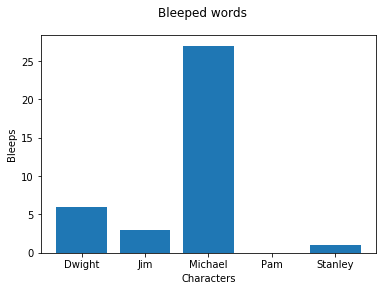

In [55]:
plt.bar(names, count)
plt.suptitle('Bleeped words')
plt.xlabel('Characters')
plt.ylabel('Bleeps')
plt.show()